In [6]:
from packaging import version
from os import path

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats

import tensorboard as tb

In [7]:
major_ver, minor_ver, _ = version.parse(tb.__version__).release
assert major_ver >= 2 and minor_ver >= 3, \
    "This notebook requires TensorBoard 2.3 or later."
print("TensorBoard version: ", tb.__version__)

TensorBoard version:  2.9.1


In [8]:
# tensorboard dev upload --logdir C:\Users\danie\OneDrive\Desktop\Bachelorarbeit\main\monitoring\logs\fit
experiment_id = "l85sKqh3Qh6mf9dCYsnLYA"
experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
df = experiment.get_scalars()
df.head()

,run,tag,step,value
0,cnn1_no_noise\train,epoch_accuracy,0,0.379531
1,cnn1_no_noise\train,epoch_accuracy,1,0.557656
2,cnn1_no_noise\train,epoch_accuracy,2,0.542813
3,cnn1_no_noise\train,epoch_accuracy,3,0.557344
4,cnn1_no_noise\train,epoch_accuracy,4,0.623594


In [9]:
runs = df["run"].unique()
metrics = df["tag"].unique()
print(runs)
print(metrics)

['cnn1_no_noise\\train' 'cnn1_no_noise\\validation' 'cnn1_noise_01\\train'
 'cnn1_noise_01\\validation' 'cnn1_noise_03\\train'
 'cnn1_noise_03\\validation' 'cnn1_noise_05\\train'
 'cnn1_noise_05\\validation' 'mlp1_no_noise\\train'
 'mlp1_no_noise\\validation' 'mlp1_noise_01\\train'
 'mlp1_noise_01\\validation' 'mlp1_noise_03\\train'
 'mlp1_noise_03\\validation' 'mlp1_noise_05\\train'
 'mlp1_noise_05\\validation' 'mlp_s1_dropout_10\\train'
 'mlp_s1_dropout_10\\validation' 'mlp_s1_dropout_20\\train'
 'mlp_s1_dropout_20\\validation' 'mlp_s1_dropout_30\\train'
 'mlp_s1_dropout_30\\validation' 'mlp_s1_dropout_40\\train'
 'mlp_s1_dropout_40\\validation' 'mlp_s1_dropout_50\\train'
 'mlp_s1_dropout_50\\validation']
['epoch_accuracy' 'epoch_loss' 'evaluation_accuracy_vs_iterations'
 'evaluation_loss_vs_iterations' 'epoch_mae' 'epoch_mape'
 'evaluation_mae_vs_iterations' 'evaluation_mape_vs_iterations']


In [10]:
colors = sns.color_palette("Paired")
colors

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

[Text(0.5, 1.0, 'Epoch Loss'), Text(0.5, 0, 'Epochs'), (0.0, 0.4)]

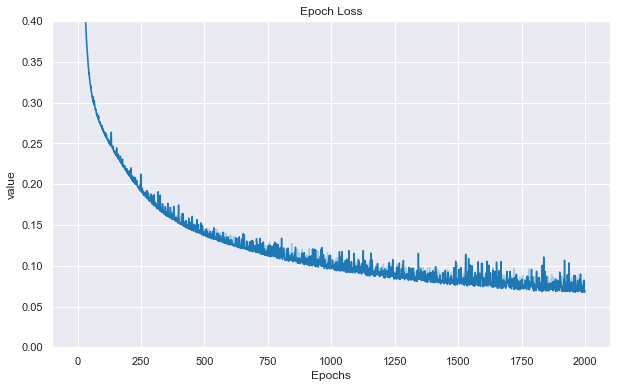

In [11]:
train = df[df.run.str.endswith("cnn1_no_noise\\train")&(df.tag == "epoch_loss")]
validation = df[df.run.str.endswith("cnn1_no_noise\\validation")&(df.tag == "epoch_loss")]
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=train, x="step", y="value",color=colors[0])
sns.lineplot(data=validation, x="step", y="value",color=colors[1])
ax.set(title = "Epoch Loss",xlabel = "Epochs",ylim=(0, 0.4))



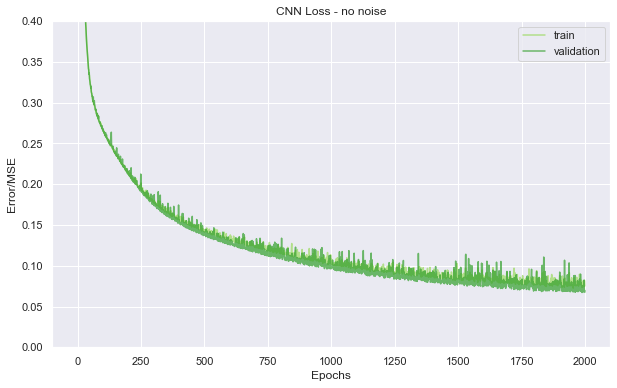

In [12]:
data = df[df.tag == "epoch_loss"]
data = (data.pivot(index = "run",columns= "step",values="value")).T
title = 'CNN Loss - no noise'
file = 'cnn1_no_noise'
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=data, x="step", y= f'{file}\\train',color=colors[2])
sns.lineplot(data=data, x="step", y= f'{file}\\validation',color=colors[3],alpha = 0.7)
ax.set(title=f"{title}", xlabel="Epochs",ylabel = "Error/MSE", ylim=(0, 0.4))
ax.legend(["train","validation"])
plt.savefig(f'{title}.png',dpi = 300)

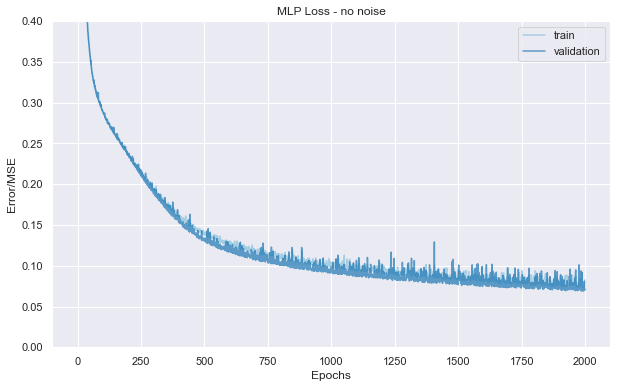

In [13]:
title = 'MLP Loss - no noise'
file = 'mlp1_no_noise'
n = 0
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=data, x="step", y= f'{file}\\train',color=colors[int(2*n)])
sns.lineplot(data=data, x="step", y= f'{file}\\validation',color=colors[int(2*n+1)],alpha = 0.7)
ax.set(title=f"{title}", xlabel="Epochs",ylabel = "Error/MSE", ylim=(0, 0.4))
ax.legend(["train","validation"])
plt.savefig(f'{title}.png',dpi = 300)

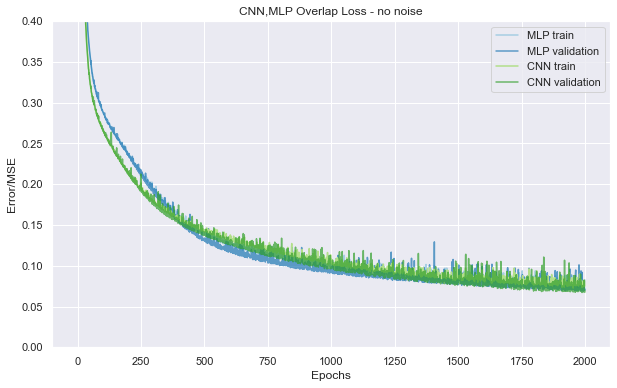

In [14]:
title = 'CNN,MLP Overlap Loss - no noise'
files = ['mlp1_no_noise','cnn1_no_noise']
n = 0
plt.figure(figsize=(10, 6))
for n, file in enumerate(files):
    ax = sns.lineplot(data=data, x="step", y= f'{file}\\train',color=colors[int(2*n)])
    sns.lineplot(data=data, x="step", y= f'{file}\\validation',color=colors[int(2*n+1)],alpha = 0.7)

ax.set(title=f"{title}", xlabel="Epochs",ylabel = "Error/MSE", ylim=(0, 0.4))
ax.legend(["MLP train","MLP validation","CNN train","CNN validation"])
plt.savefig(f'{title}.png',dpi = 300)

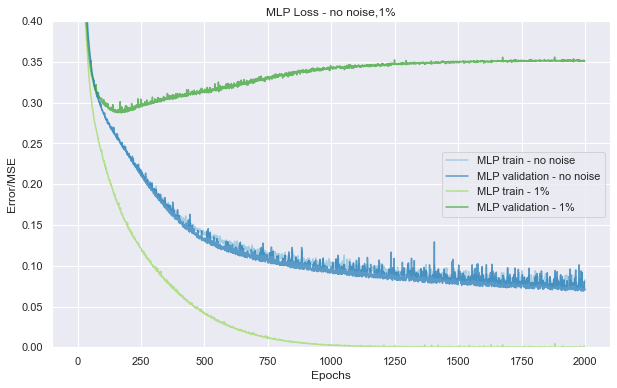

In [15]:
title = 'MLP Loss - no noise,1%'
files = ['mlp1_no_noise','mlp1_noise_01']
n = 0
plt.figure(figsize=(10, 6))
for n, file in enumerate(files):
    ax = sns.lineplot(data=data, x="step", y= f'{file}\\train',color=colors[int(2*n)])
    sns.lineplot(data=data, x="step", y= f'{file}\\validation',color=colors[int(2*n+1)],alpha = 0.7)

ax.set(title=f"{title}", xlabel="Epochs",ylabel = "Error/MSE", ylim=(0, 0.4))
ax.legend(["MLP train - no noise ","MLP validation - no noise","MLP train - 1% ","MLP validation - 1%"])
plt.savefig(f'{title}.png',dpi = 300)

In [16]:
title = 'MLP Loss - no noise,1%,3%,5%'
files = ['mlp1_no_noise', 'mlp1_noise_01','mlp1_noise_03','mlp1_noise_05']
n = 0
plt.figure(figsize=(10, 6))
for n, file in enumerate(files):
    ax = sns.lineplot(data=data, x="step", y=f'{file}\\train', color=colors[int(2 * n)])
    sns.lineplot(data=data, x="step", y=f'{file}\\validation', color=colors[int(2 * n + 1)], alpha=0.7)

ax.set(title=f"{title}", xlabel="Epochs", ylabel="Error/MSE", ylim=(0, 0.65))
ax.legend(["MLP train - no noise ", "MLP validation - no noise", "MLP train - 1% ", "MLP validation - 1%", "MLP train - 3% ", "MLP validation - 3%", "MLP train - 3% ", "MLP validation - 3%"])plt.savefig(f'{title}.png', dpi=300)

SyntaxError: invalid syntax (Temp/ipykernel_17284/2533215770.py, line 10)

In [ ]:
title = 'MLP Loss 1% - no, 10%,30%,50% dropout'
files = ['mlp1_noise_01', 'mlp_s1_dropout_10', 'mlp_s1_dropout_30', 'mlp_s1_dropout_50']
n = 0
plt.figure(figsize=(10, 6))
for n, file in enumerate(files):
    ax = sns.lineplot(data=data, x="step", y=f'{file}\\train', color=colors[int(2 * n)])
    sns.lineplot(data=data, x="step", y=f'{file}\\validation', color=colors[int(2 * n + 1)], alpha=0.7)

ax.set(title=f"{title}", xlabel="Epochs", ylabel="Error/MSE", ylim=(0, 0.4))
ax.legend(
    ["MLP train 1% - 0% do ", "MLP validation 1% - 0% do", "MLP train 1% - 10% do ", "MLP validation 1% - 10% do", "MLP train 1% - 30% do ", "MLP validation 1% - 30% do", "MLP train 1% - 50% do ", "MLP validation 1% - 50% do",])
plt.savefig(f'{title}.png', dpi=300)

In [ ]:
title = 'CNN Loss - no,1% noise'
files = ['cnn1_no_noise', 'cnn1_noise_01']
n = 0
plt.figure(figsize=(10, 6))
for n, file in enumerate(files):
    ax = sns.lineplot(data=data, x="step", y=f'{file}\\train', color=colors[int(2 * n)])
    sns.lineplot(data=data, x="step", y=f'{file}\\validation', color=colors[int(2 * n + 1)], alpha=0.7)

ax.set(title=f"{title}", xlabel="Epochs", ylabel="Error/MSE", ylim=(0, 0.4))
ax.legend(["CNN train - no noise ","CNN validation - no noise","CNN train - 1% ","CNN validation - 1%"])
plt.savefig(f'{title}.png', dpi=300)

In [ ]:
title = 'CNN Loss - 1%,3%,5% noise'
files = [ 'cnn1_noise_01', 'cnn1_noise_03', 'cnn1_noise_05']

plt.figure(figsize=(10, 6))
for n, file in enumerate(files):
    n += 1
    ax = sns.lineplot(data=data, x="step", y=f'{file}\\train', color=colors[int(2 * n)])
    sns.lineplot(data=data, x="step", y=f'{file}\\validation', color=colors[int(2 * n + 1)], alpha=0.7)

ax.set(title=f"{title}", xlabel="Epochs", ylabel="Error/MSE", ylim=(0, 0.5))
ax.legend([ "CNN train - 1% ", "CNN validation - 1%", "CNN train - 3% ", "CNN validation - 3%", "CNN train - 5% ", "CNN validation - 5%"])
plt.savefig(f'{title}.png', dpi=300)

In [ ]:
title = 'MLP CNN Loss - no,1% noise,dropout10'
files = [ 'mlp1_no_noise', 'mlp1_noise_01','cnn1_noise_01', 'mlp_s1_dropout_10']

plt.figure(figsize=(10, 6))
for n, file in enumerate(files):
    ax = sns.lineplot(data=data, x="step", y=f'{file}\\train', color=colors[int(2 * n)])
    sns.lineplot(data=data, x="step", y=f'{file}\\validation', color=colors[int(2 * n + 1)], alpha=0.7)

ax.set(title=f"{title}", xlabel="Epochs", ylabel="Error/MSE", ylim=(0, 0.4))
ax.legend([ "MLP train - 0% noise", "MLP validation - 0% noise","MLP train - 1% noise", "MLP validation - 1% noise", "CNN train - 1% noise ", "CNN validation - 1%noise","MLP train - 1% noise 10% do", "MLP validation - 1% noise 10% do"],loc = "center right")
plt.savefig(f'{title}.png', dpi=300)